# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

## Unity Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `unity_env_filename` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
unity_env_filename="Reacher.app"
```

In [2]:
unity_env_filename = r"C:\Users\jofan\rl\deep-reinforcement-learning\p2_continuous-control\Reacher_Windows_x86_64\Reacher.exe"
env = UnityEnvironment(file_name=unity_env_filename)
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


In [4]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.13199999704957008


## PPO Agent

Here we folked the DeepRL repository https://github.com/ShangtongZhang/DeepRL and adapt it to run this project (see https://github.com/joyce-fang/DeepRL/tree/drlnd-p2 for the changes)

In [5]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)


In [6]:
from DeepRL.deep_rl import utils, network, agent
import torch
import reacher_env

In [7]:
wrapped_env = reacher_env.ReacherEnv(env)

In [8]:
config = agent.PPOAgent.generate_config(utils)#, reacher_env, unity_env_filename)

### Training with PPO agent

In [9]:
ppo_agent = agent.PPOAgent(config, wrapped_env)

utils.misc.run_steps(ppo_agent)

# episode: 1 --- total score (averaged over agents) this episode: 0.09499999787658453
# episode: 2 --- total score (averaged over agents) this episode: 0.3089999930933118
# episode: 3 --- total score (averaged over agents) this episode: 0.859499980788678
# episode: 4 --- total score (averaged over agents) this episode: 1.0319999769330024
# episode: 5 --- total score (averaged over agents) this episode: 1.1259999748319387
# episode: 6 --- total score (averaged over agents) this episode: 1.4609999673441052
# episode: 7 --- total score (averaged over agents) this episode: 1.4824999668635428
# episode: 8 --- total score (averaged over agents) this episode: 1.4474999676458538
# episode: 9 --- total score (averaged over agents) this episode: 1.9189999571070075
# episode: 10 --- total score (averaged over agents) this episode: 1.4114999684505165
# episode: 11 --- total score (averaged over agents) this episode: 1.676499962527305
# episode: 12 --- total score (averaged over agents) this episod

# episode: 96 --- total score (averaged over agents) this episode: 28.056499372888357
# episode: 97 --- total score (averaged over agents) this episode: 30.758999312482775
# episode: 98 --- total score (averaged over agents) this episode: 28.19499936979264
# episode: 99 --- total score (averaged over agents) this episode: 30.78999931178987
# episode: 100 --- total score (averaged over agents) this episode: 31.1594993035309
# episode: 101 --- total score (averaged over agents) this episode: 33.363499254267666
# episode: 102 --- total score (averaged over agents) this episode: 32.28199927844107
# episode: 103 --- total score (averaged over agents) this episode: 34.22849923493341
# episode: 104 --- total score (averaged over agents) this episode: 35.875999198108914
# episode: 105 --- total score (averaged over agents) this episode: 32.85649926559999
# episode: 106 --- total score (averaged over agents) this episode: 35.56399920508265
# episode: 107 --- total score (averaged over agents) t

# episode: 191 --- total score (averaged over agents) this episode: 38.884499130863695
# episode: 192 --- total score (averaged over agents) this episode: 39.20949912359938
# episode: 193 --- total score (averaged over agents) this episode: 38.027999150007965
# episode: 194 --- total score (averaged over agents) this episode: 38.68249913537875
# episode: 195 --- total score (averaged over agents) this episode: 38.79949913276359
# episode: 196 --- total score (averaged over agents) this episode: 39.053499127086255
# episode: 197 --- total score (averaged over agents) this episode: 39.00999912805855
# episode: 198 --- total score (averaged over agents) this episode: 39.013499127980324
# episode: 199 --- total score (averaged over agents) this episode: 38.674999135546386
# episode: 200 --- total score (averaged over agents) this episode: 38.91699913013726
# episode: 201 --- total score (averaged over agents) this episode: 38.76349913356826
# episode: 202 --- total score (averaged over age

### Plot result

In [10]:
import matplotlib.pylab as plt

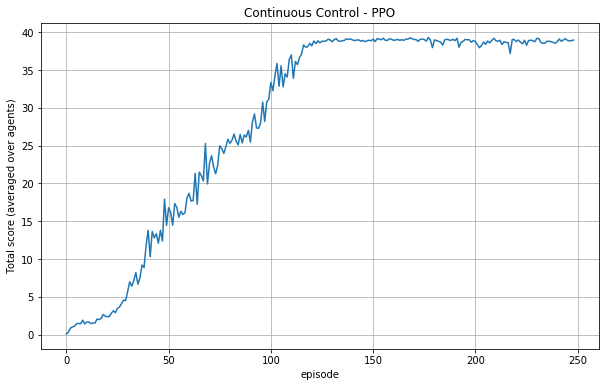

In [11]:
fig = plt.figure(figsize=(10,6))
plt.plot(ppo_agent.mean_score_history)
plt.grid()
plt.title('Continuous Control - PPO')
plt.xlabel('episode')
plt.ylabel('Total score (averaged over agents)')
fig.savefig('result-ppo.png')